In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [24]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data")
ARTIFACT_DIR = os.path.join(BASE_DIR, "artifacts_v2")

os.makedirs(ARTIFACT_DIR, exist_ok=True)

TRAIN_CSV = os.path.join(DATA_DIR, "train (2).csv")
TEST_CSV = os.path.join(DATA_DIR, "test.csv")

train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

print(train_df.shape, test_df.shape)



(16209, 21) (5404, 20)


In [25]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

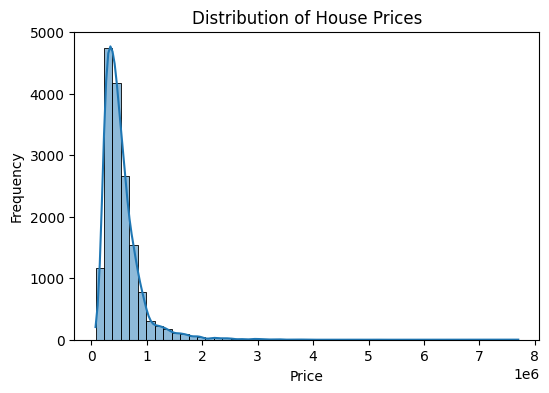

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(train_df["price"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


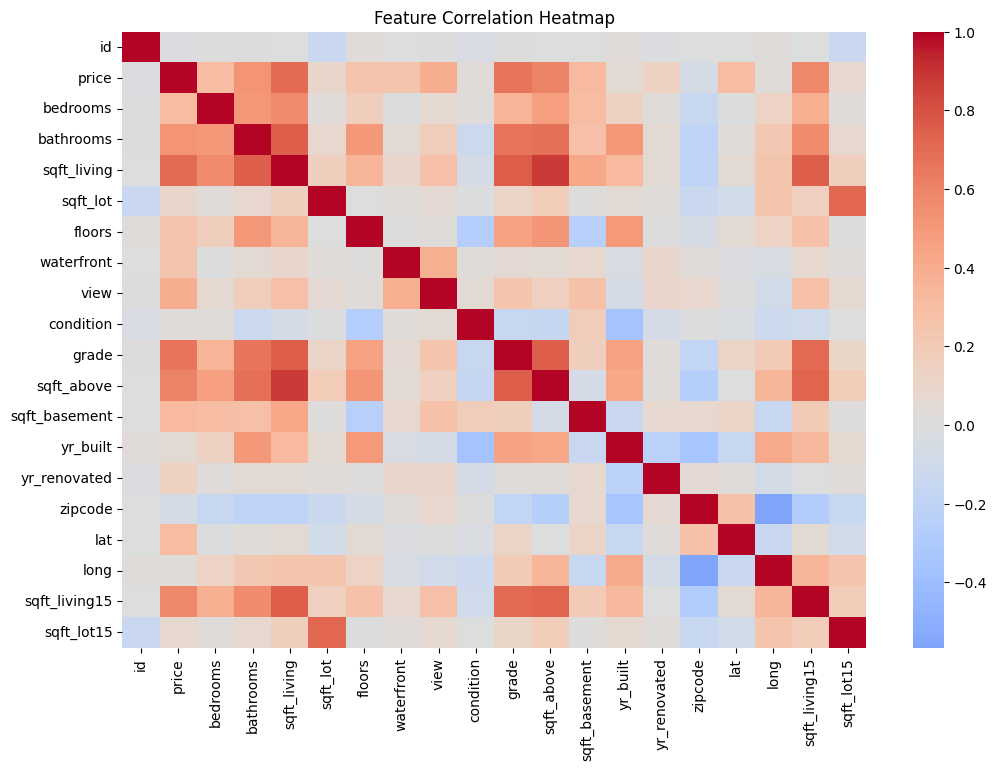

In [26]:
plt.figure(figsize=(12,8))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


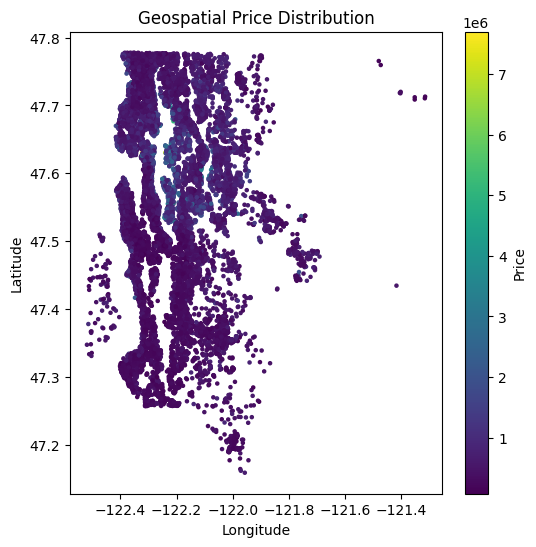

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(
    train_df["long"],
    train_df["lat"],
    c=train_df["price"],
    cmap="viridis",
    s=5
)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Price Distribution")
plt.show()


In [28]:
TARGET = "price"

TAB_FEATURES = [
    "bedrooms", "bathrooms", "sqft_living",
    "sqft_lot", "floors", "condition",
    "grade", "waterfront", "view",
    "sqft_above", "sqft_basement",
    "lat", "long"
]


In [29]:
train_df[TAB_FEATURES] = train_df[TAB_FEATURES].fillna(train_df[TAB_FEATURES].median())
test_df[TAB_FEATURES] = test_df[TAB_FEATURES].fillna(train_df[TAB_FEATURES].median())


In [30]:
X = train_df[TAB_FEATURES]
y = train_df[TARGET]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df[TAB_FEATURES])


In [31]:
np.save(os.path.join(ARTIFACT_DIR, "X_train_tab_v2.npy"), X_train_scaled)
np.save(os.path.join(ARTIFACT_DIR, "X_val_tab_v2.npy"), X_val_scaled)
np.save(os.path.join(ARTIFACT_DIR, "X_test_tab_v2.npy"), X_test_scaled)

np.save(os.path.join(ARTIFACT_DIR, "y_train_v2.npy"), y_train.values)
np.save(os.path.join(ARTIFACT_DIR, "y_val_v2.npy"), y_val.values)

joblib.dump(scaler, os.path.join(ARTIFACT_DIR, "scaler_v2.pkl"))

print("✅ Preprocessing completed and artifacts saved")


✅ Preprocessing completed and artifacts saved
